In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')

In [3]:
train_df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [4]:
X = train_df.drop(columns=['ID', 'y'])
y = train_df.y

In [5]:
# import sklearn.feature_selection

# select = sklearn.feature_selection.SelectKBest(k=8)
# selected_features = select.fit(X, y)
# indices_selected = selected_features.get_support(indices=True)
# colnames_selected = [X.columns[i] for i in indices_selected]

# X = X[colnames_selected]
# print(colnames_selected)

In [6]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly_scaler = poly.fit(X)

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    print(len(colnames))
    
    # Find interactions
    df = poly.transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    return df

In [7]:
poly_train_df = add_interactions(X)
noint_indices = [i for i, x in enumerate(list((poly_train_df == 0).all())) if x]
poly_train_df = poly_train_df.drop(poly_train_df.columns[noint_indices], axis=1)

136


In [8]:
poly_train_df.shape

(10834, 136)

In [9]:
X.shape

(10834, 16)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(poly_train_df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

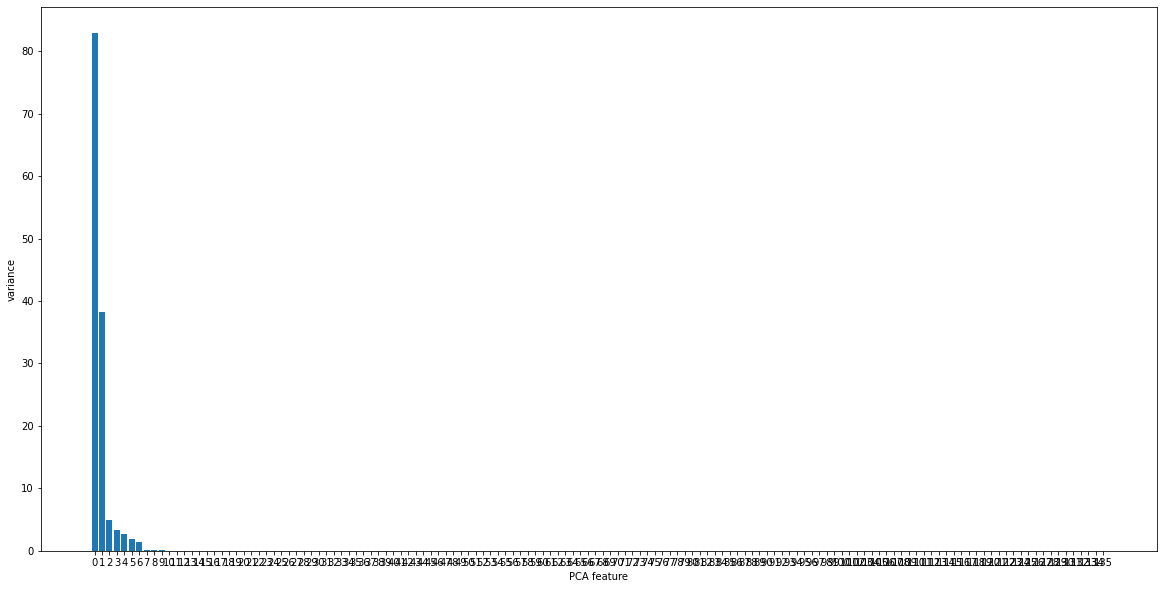

In [11]:
features = range(pca.n_components_)
fig = plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()